In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


#### Q1. Identify the output variable.

#### Q2. Understand the type of data.

#### Q3. Check if there are any biases in your dataset.

#### Q4. Check whether all members of the house have the same poverty level.

#### Q5. Check if there is a house without a family head.
 
#### Q6. Set the poverty level of the members and the head of the house same in a family.

#### Q7. Count how many null values are existing in columns.

#### Q8. Remove null value rows of the target variable.

#### Q9. Predict the accuracy using random forest classifier.

#### Q10. Check the accuracy using a random forest with cross-validation

In [2]:
train = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')

In [3]:
train.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.0,64.0,144.0,4489,4


In [4]:
# v2a1, Monthly rent payment
# hacdor, =1 Overcrowding by bedrooms
# rooms,  number of all rooms in the house                    
# hacapo, =1 Overcrowding by rooms
# v14a, =1 has bathroom in the household                           
# refrig, =1 if the household has refrigerator
# v18q, owns a tablet
# v18q1, number of tablets household owns
# r4h1, Males younger than 12 years of age
# r4h2, Males 12 years of age and older
# r4h3, Total males in the household
# r4m1, Females younger than 12 years of age
# r4m2, Females 12 years of age and older
# r4m3, Total females in the household
# r4t1, persons younger than 12 years of age
# r4t2, persons 12 years of age and older
# r4t3, Total persons in the household
# tamhog, size of the household
# tamviv, number of persons living in the household
# escolari, years of schooling
# rez_esc, Years behind in school
# hhsize, household size
# paredblolad, =1 if predominant material on the outside wall is block or brick
# paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
# paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
# pareddes, =1 if predominant material on the outside wall is waste material
# paredmad, =1 if predominant material on the outside wall is wood
# paredzinc, =1 if predominant material on the outside wall is zink
# paredfibras, =1 if predominant material on the outside wall is natural fibers
# paredother, =1 if predominant material on the outside wall is other
# pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
# pisocemento, =1 if predominant material on the floor is cement
# pisoother, =1 if predominant material on the floor is other
# pisonatur, =1 if predominant material on the floor is  natural material
# pisonotiene, =1 if no floor at the household
# pisomadera, =1 if predominant material on the floor is wood
# techozinc, =1 if predominant material on the roof is metal foil or zink
# techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
# techocane, =1 if predominant material on the roof is natural fibers
# techootro, =1 if predominant material on the roof is other
# cielorazo, =1 if the house has ceiling
# abastaguadentro, =1 if water provision inside the dwelling
# abastaguafuera, =1 if water provision outside the dwelling
# abastaguano, =1 if no water provision
# public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
# planpri, =1 electricity from private plant
# noelec, =1 no electricity in the dwelling
# coopele, =1 electricity from cooperative
# sanitario1, =1 no toilet in the dwelling
# sanitario2, =1 toilet connected to sewer or cesspool
# sanitario3, =1 toilet connected to  septic tank
# sanitario5, =1 toilet connected to black hole or letrine
# sanitario6, =1 toilet connected to other system
# energcocinar1, =1 no main source of energy used for cooking (no kitchen)
# energcocinar2, =1 main source of energy used for cooking electricity
# energcocinar3, =1 main source of energy used for cooking gas
# energcocinar4, =1 main source of energy used for cooking wood charcoal
# elimbasu1, =1 if rubbish disposal mainly by tanker truck
# elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
# elimbasu3, =1 if rubbish disposal mainly by burning
# elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
# elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
# elimbasu6, =1 if rubbish disposal mainly other
# epared1, =1 if walls are bad
# epared2, =1 if walls are regular
# epared3, =1 if walls are good
# etecho1, =1 if roof are bad
# etecho2, =1 if roof are regular
# etecho3, =1 if roof are good
# eviv1, =1 if floor are bad
# eviv2, =1 if floor are regular
# eviv3, =1 if floor are good
# dis, =1 if disable person
# male, =1 if male
# female, =1 if female
# estadocivil1, =1 if less than 10 years old
# estadocivil2, =1 if free or coupled uunion
# estadocivil3, =1 if married
# estadocivil4, =1 if divorced
# estadocivil5, =1 if separated
# estadocivil6, =1 if widow/er
# estadocivil7, =1 if single
# parentesco1, =1 if household head
# parentesco2, =1 if spouse/partner
# parentesco3, =1 if son/doughter
# parentesco4, =1 if stepson/doughter
# parentesco5, =1 if son/doughter in law
# parentesco6, =1 if grandson/doughter
# parentesco7, =1 if mother/father
# parentesco8, =1 if father/mother in law
# parentesco9, =1 if brother/sister
# parentesco10, =1 if brother/sister in law
# parentesco11, =1 if other family member
# parentesco12, =1 if other non family member
# idhogar, Household level identifier
# hogar_nin, Number of children 0 to 19 in household
# hogar_adul, Number of adults in household
# hogar_mayor, # of individuals 65+ in the household
# hogar_total, # of total individuals in the household
# dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
# meaneduc,average years of education for adults (18+)
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary
# instlevel3, =1 complete primary
# instlevel4, =1 incomplete academic secondary level
# instlevel5, =1 complete academic secondary level
# instlevel6, =1 incomplete technical secondary level
# instlevel7, =1 complete technical secondary level
# instlevel8, =1 undergraduate and higher education
# instlevel9, =1 postgraduate higher education
# bedrooms, number of bedrooms
# overcrowding, # persons per room
# tipovivi1, =1 own and fully paid house
# tipovivi2, "=1 own,  paying in installments"
# tipovivi3, =1 rented
# tipovivi4, =1 precarious
# tipovivi5, "=1 other(assigned,  borrowed)"
# computer, =1 if the household has notebook or desktop computer
# television, =1 if the household has TV
# mobilephone, =1 if mobile phone
# qmobilephone, # of mobile phones
# lugar1, =1 region Central
# lugar2, =1 region Chorotega
# lugar3, =1 region PacÃƒÂ­fico central
# lugar4, =1 region Brunca
# lugar5, =1 region Huetar AtlÃƒÂ¡ntica
# lugar6, =1 region Huetar Norte
# area1, =1 zona urbana
# area2, =2 zona rural
# age, Age in years
# SQBescolari, escolari squared
# SQBage, age squared
# SQBhogar_total, hogar_total squared
# SQBedjefe, edjefe squared
# SQBhogar_nin, hogar_nin squared
# SQBovercrowding, overcrowding squared
# SQBdependency, dependency squared
# SQBmeaned, square of the mean years of education of adults (>=18) in the household


<!-- v2a1, Monthly rent payment
hacdor, =1 Overcrowding by bedrooms
rooms,  number of all rooms in the house
hacapo, =1 Overcrowding by rooms
v14a, =1 has bathroom in the household
refrig, =1 if the household has refrigerator
v18q, owns a tablet
v18q1, number of tablets household owns
r4h1, Males younger than 12 years of age
r4h2, Males 12 years of age and older
r4h3, Total males in the household
r4m1, Females younger than 12 years of age
r4m2, Females 12 years of age and older
r4m3, Total females in the household
r4t1, persons younger than 12 years of age
r4t2, persons 12 years of age and older
r4t3, Total persons in the household
tamhog, size of the household
tamviv, number of persons living in the household
escolari, years of schooling
rez_esc, Years behind in school
hhsize, household size
paredblolad, =1 if predominant material on the outside wall is block or brick
paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
pareddes, =1 if predominant material on the outside wall is waste material
paredmad, =1 if predominant material on the outside wall is wood
paredzinc, =1 if predominant material on the outside wall is zink
paredfibras, =1 if predominant material on the outside wall is natural fibers
paredother, =1 if predominant material on the outside wall is other
pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento, =1 if predominant material on the floor is cement
pisoother, =1 if predominant material on the floor is other
pisonatur, =1 if predominant material on the floor is  natural material
pisonotiene, =1 if no floor at the household
pisomadera, =1 if predominant material on the floor is wood
techozinc, =1 if predominant material on the roof is metal foil or zink
techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane, =1 if predominant material on the roof is natural fibers
techootro, =1 if predominant material on the roof is other
cielorazo, =1 if the house has ceiling
abastaguadentro, =1 if water provision inside the dwelling
abastaguafuera, =1 if water provision outside the dwelling
abastaguano, =1 if no water provision
public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri, =1 electricity from private plant
noelec, =1 no electricity in the dwelling
coopele, =1 electricity from cooperative
sanitario1, =1 no toilet in the dwelling
sanitario2, =1 toilet connected to sewer or cesspool
sanitario3, =1 toilet connected to  septic tank
sanitario5, =1 toilet connected to black hole or letrine
sanitario6, =1 toilet connected to other system
energcocinar1, =1 no main source of energy used for cooking (no kitchen)
energcocinar2, =1 main source of energy used for cooking electricity
energcocinar3, =1 main source of energy used for cooking gas
energcocinar4, =1 main source of energy used for cooking wood charcoal
elimbasu1, =1 if rubbish disposal mainly by tanker truck
elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3, =1 if rubbish disposal mainly by burning
elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6, =1 if rubbish disposal mainly other
epared1, =1 if walls are bad
epared2, =1 if walls are regular
epared3, =1 if walls are good
etecho1, =1 if roof are bad
etecho2, =1 if roof are regular
etecho3, =1 if roof are good
eviv1, =1 if floor are bad
eviv2, =1 if floor are regular
eviv3, =1 if floor are good
dis, =1 if disable person
male, =1 if male
female, =1 if female
estadocivil1, =1 if less than 10 years old
estadocivil2, =1 if free or coupled uunion
estadocivil3, =1 if married
estadocivil4, =1 if divorced
estadocivil5, =1 if separated
estadocivil6, =1 if widow/er
estadocivil7, =1 if single
parentesco1, =1 if household head
parentesco2, =1 if spouse/partner
parentesco3, =1 if son/doughter
parentesco4, =1 if stepson/doughter
parentesco5, =1 if son/doughter in law
parentesco6, =1 if grandson/doughter
parentesco7, =1 if mother/father
parentesco8, =1 if father/mother in law
parentesco9, =1 if brother/sister
parentesco10, =1 if brother/sister in law
parentesco11, =1 if other family member
parentesco12, =1 if other non family member
idhogar, Household level identifier
hogar_nin, Number of children 0 to 19 in household
hogar_adul, Number of adults in household
hogar_mayor, # of individuals 65+ in the household
hogar_total, # of total individuals in the household
dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc,average years of education for adults (18+)
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary
instlevel3, =1 complete primary
instlevel4, =1 incomplete academic secondary level
instlevel5, =1 complete academic secondary level
instlevel6, =1 incomplete technical secondary level
instlevel7, =1 complete technical secondary level
instlevel8, =1 undergraduate and higher education
instlevel9, =1 postgraduate higher education
bedrooms, number of bedrooms
overcrowding, # persons per room
tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own,  paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned,  borrowed)"
computer, =1 if the household has notebook or desktop computer
television, =1 if the household has TV
mobilephone, =1 if mobile phone
qmobilephone, # of mobile phones
lugar1, =1 region Central
lugar2, =1 region Chorotega
lugar3, =1 region PacÃƒÂ­fico central
lugar4, =1 region Brunca
lugar5, =1 region Huetar AtlÃƒÂ¡ntica
lugar6, =1 region Huetar Norte
area1, =1 zona urbana
area2, =2 zona rural
age, Age in years
SQBescolari, escolari squared
SQBage, age squared
SQBhogar_total, hogar_total squared
SQBedjefe, edjefe squared
SQBhogar_nin, hogar_nin squared
SQBovercrowding, overcrowding squared
SQBdependency, dependency squared
SQBmeaned, square of the mean years of education of adults (>=18) in the household
 -->

In [5]:
test.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681


In [6]:
train.shape

(9557, 143)

In [7]:
test.shape

(23856, 142)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [9]:
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

### Q1. What is our Target Variable

In [10]:
for i in train.columns:
    if i not in test.columns:
        print("Our Target variable is {}".format(i))

Our Target variable is Target


In [11]:
train['Target'].isnull().sum()

0

In [12]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

Target - the target is an ordinal variable indicating groups of income levels.

1. extreme poor people       = 755 
2. moderate poverty          = 1597
3. vulnerable households     = 1209
4. non vulnerable households = 5996 


In [13]:
train['idhogar'].dtype

dtype('O')

In [14]:
train['idhogar'].isnull().sum()

0

In [15]:
train['parentesco1'].unique()

array([1, 0])

### Q2. Understanding Type of Data 

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


### We have three datatypes here : float64(8), int64(130), object(5)


In [17]:
null_counts = train.select_dtypes('int64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [18]:
null_counts = train.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [19]:
null_counts = train.select_dtypes('object').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

So We dont have null values in int and object data types .


In [20]:
float_df = train.select_dtypes(include=['float64'])
float_df.head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


### Float type Column Description:

'v2a1': Monthly rent payment

*'v18q1': Number of tablets household owns

*'rez_esc': Years behind in school

*'meaneduc': Average years of education for adults (18+)

*'overcrowding': # persons per room

*'SQBovercrowding': overcrowding squared

*'SQBdependency': dependency squared

*'SQBmeaned': square of the mean years of education of adults (>=18) in the household

In [21]:
object_df = train.select_dtypes(include=['object'])
object_df.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


Object Type column Decription

'dependency': (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

*'edjefe': years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

*'edjefa': years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

*'Id': This column identifies each individual uniquely

*'idhogar': This column identifies each household uniquely and this will be used for analysis based on household level

In [22]:
int_df = train.select_dtypes(include=['int'])
int_df.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


### Q3. Check for biases in the dataset 

 So we need to find those people who are poverty stricken.
 and we know that our target variable has 4 classes which are :
 
1. extreme poor people       = 755 
2. moderate poverty          = 1597
3. vulnerable households     = 1209
4. non vulnerable households = 5996 

array([[<AxesSubplot:title={'center':'Target'}>]], dtype=object)

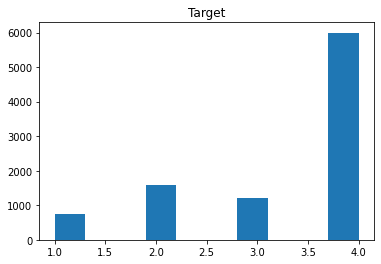

In [23]:
train.hist(column='Target',grid = False)

### As we can see we have class imbalanced dataset , there is bias in this dataset as no. of people who are extremely poor are lower in number.

In [24]:
# so we need to balance this dataset before moving further ahead 

# We can put the class 1 and class 2 as people who should get aid from the institutions, so we are defining new class labels here 

# wherein we will make this a binary classification problem : 

# ### class 1 : qualified for aid(old class 1 and 2 )

# ### class 0 : not qualified for aid(old class 3 and 4)b

### Q4.Check whether all members of the house have the same poverty level.

In [25]:
train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
6b35cdcf0    11
b7a0b59d7    11
             ..
4d6c3f4af     1
8161a5155     1
9d05282ce     1
0b766595d     1
fd89cbc8b     1
Name: idhogar, Length: 2988, dtype: int64

In [26]:
# count of members in each household
household = train['idhogar'].value_counts()
household = household.rename_axis('idhogar').reset_index(name='MemberCount')
household.head()

,idhogar,MemberCount
0,fd8a6d014,13
1,ae6cf0558,12
2,0c7436de6,12
3,6b35cdcf0,11
4,b7a0b59d7,11


In [27]:
type(household)

pandas.core.frame.DataFrame

In [28]:
fam_head = train['parentesco1'].value_counts()
fam_head.head()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [29]:
same_pov_household = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
same_pov_household.rename_axis('idhogar').reset_index(name='target')

,idhogar,target
0,001ff74ca,True
1,003123ec2,True
2,004616164,True
3,004983866,True
4,005905417,True
...,...,...
2983,ff9343a35,True
2984,ff9d5ab17,True
2985,ffae4a097,True
2986,ffe90d46f,True


In [30]:
not_same_pov = same_pov_household[same_pov_household == False]
print('There are {} households where all the members does not have unique target values'.format(len(not_same_pov)))

There are 85 households where all the members does not have unique target values


In [31]:
train[train['idhogar'] == not_same_pov.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [32]:
type(not_same_pov)

pandas.core.series.Series

### Q5. Check if there is a house without a family head.

In [33]:
household_head = train.groupby('idhogar')['parentesco1'].sum()
household_head.rename_axis('idhogar').reset_index(name= 'Target')

,idhogar,Target
0,001ff74ca,1
1,003123ec2,1
2,004616164,1
3,004983866,1
4,005905417,1
...,...,...
2983,ff9343a35,1
2984,ff9d5ab17,1
2985,ffae4a097,1
2986,ffe90d46f,1


In [34]:
household_without_head = train.loc[train['idhogar'].isin(household_head[household_head == 0].index), :]

In [35]:
household_without_head.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4935,ID_717302050,NaN,0,8,0,1,1,0,NaN,0,...,36,1156,16,36,4,0.64,1.0,36.00,1156,3
4975,ID_ff6f13458,NaN,0,4,0,1,1,0,NaN,1,...,81,256,16,81,4,4.00,1.0,56.25,256,3


In [36]:
print('There are {} households without a head.'.format(household_without_head['idhogar'].nunique()))

There are 15 households without a head.


### Q6. Set the poverty level of the members and the head of the house same in a family.

In [37]:
head_houses = train[train['parentesco1']==1].groupby('idhogar')['Target'].nunique()
head_houses

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: Target, Length: 2973, dtype: int64

In [38]:
heads = train.loc[train['parentesco1'] == 1]
heads.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4


In [39]:
heads.shape

(2973, 143)

In [40]:
head_target = heads['Target'].value_counts()
head_target

4    1954
2     442
3     355
1     222
Name: Target, dtype: int64

In [41]:
for household in not_same_pov.index:
    
       
    tar_head = float(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
   
    train.loc[train['idhogar'] == household,'Target'] = tar_head
    
    

same_pov = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_same_pov = same_pov[same_pov != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_same_pov)))

There are 0 households where the family members do not all have the same target.


### Q7. Count how many null values are existing in columns.

In [42]:
train.isnull().sum().sort_values(ascending= False )

rez_esc            7928
v18q1              7342
v2a1               6860
SQBmeaned             5
meaneduc              5
                   ... 
abastaguadentro       0
cielorazo             0
techootro             0
techocane             0
Target                0
Length: 143, dtype: int64

In [43]:
train.Target.isnull().sum()

0

### Feature Engineering

In [44]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [45]:
missing_value_df.sort_values('percent_missing', inplace=True,ascending = False)

In [46]:
missing_value_df.head()

,column_name,percent_missing
rez_esc,rez_esc,82.954902
v18q1,v18q1,76.823271
v2a1,v2a1,71.779847
SQBmeaned,SQBmeaned,0.052318
meaneduc,meaneduc,0.052318


In [47]:
train.drop(axis = 1,columns=['rez_esc','v18q1','v18q'], inplace = True)
test.drop(axis = 1,columns=['rez_esc','v18q1','v18q'], inplace = True)

### Checking for outliers

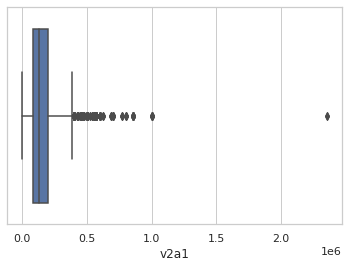

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train["v2a1"])

In [49]:
train['v2a1'].describe().T

count    2.697000e+03
mean     1.652316e+05
std      1.504571e+05
min      0.000000e+00
25%      8.000000e+04
50%      1.300000e+05
75%      2.000000e+05
max      2.353477e+06
Name: v2a1, dtype: float64

The montly rent payment column is related to the below columns provided in the list

tipovivi1 : =1 Own and fully paid house

tipovivi2 : =1 Own & paying in installments

tipovivi3 : =1, Rented

tipovivi4 : =1 precarious

tipovivi5 : =1 Other, assigned, borrowed

The below bar graph analysis on distribution of NaN based on home ownership status.

Text(0.5, 1.0, 'NaN Distribution Based On Ownership Type')

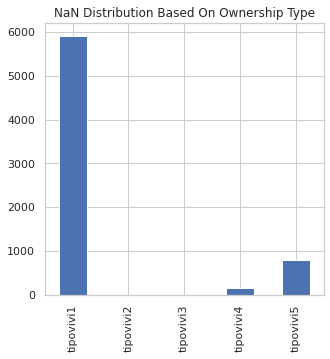

In [50]:
import matplotlib.pyplot as plt 
ownership_columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
train.loc[train['v2a1'].isnull(), ownership_columns].sum().plot.bar(figsize=(5,5))
plt.title('NaN Distribution Based On Ownership Type')

Text(0.5, 1.0, 'NaN Distribution Based On Ownership Type')

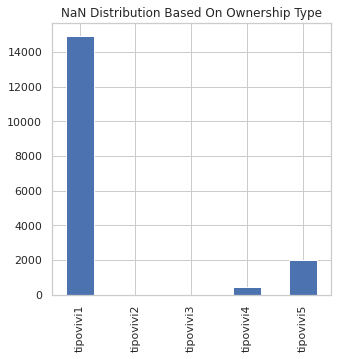

In [51]:
ownership_columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
test.loc[test['v2a1'].isnull(), ownership_columns].sum().plot.bar(figsize=(5,5))
plt.title('NaN Distribution Based On Ownership Type')

So we will impute zero on our missing values in v2a1 Column which is monthly rent payment .


In [52]:
train['v2a1'].fillna(value=0, inplace=True)

In [53]:
test['v2a1'].fillna(value=0, inplace=True)

We should focus on the squared columns whihc might be redundant. Since we have a large number of columns and these squared columns might not be helpful

1. SQBescolari= escolari squared
2. SQBage, age squared
3. SQBhogar_total, hogar_total squared
4. SQBedjefe, edjefe squared
5. SQBhogar_nin, hogar_nin squared
6. SQBovercrowding, overcrowding squared
7. SQBdependency, dependency squared
8. SQBmeaned, square of the mean years of education of adults (>=18) in the household
9. agesq= Age squared

In [54]:
drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

train.drop(columns= drop_columns, inplace=True)
test.drop(columns= drop_columns, inplace=True)

In [55]:
train['meaneduc'].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [56]:
train['meaneduc'].isnull().sum()

5

In [57]:
train['meaneduc'].fillna(value=0, inplace=True)

In [58]:
train['meaneduc'].isnull().sum()

0

In [59]:
test['meaneduc'].fillna(value =0 , inplace = True)

In [60]:
test['meaneduc'].isnull().sum()

0

### Correlation Matrix 

In [61]:
train.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,r4h1,r4h2,r4h3,r4m1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.025479,0.101634,-0.030867,0.018355,0.061534,0.017916,-0.059021,-0.041202,0.027868,...,0.172564,-0.032538,-0.023249,-0.081278,-0.096422,-0.071141,0.148049,-0.148049,-0.090771,0.166055
hacdor,-0.025479,1.000000,-0.233369,0.652594,-0.175011,-0.101965,0.232508,0.059313,0.184857,0.268978,...,-0.042086,0.017444,0.025546,-0.010172,0.037182,0.005289,0.027721,-0.027721,-0.118168,-0.192052
rooms,0.101634,-0.233369,1.000000,-0.213368,0.129183,0.130531,-0.066578,0.267627,0.195222,-0.032558,...,0.223771,-0.073862,-0.130994,-0.051941,-0.099481,-0.050428,0.130286,-0.130286,0.077046,0.229089
hacapo,-0.030867,0.652594,-0.213368,1.000000,-0.150986,-0.124506,0.226378,0.126645,0.240056,0.241452,...,-0.038896,0.023858,-0.005963,0.000737,0.023113,0.024699,0.008402,-0.008402,-0.087773,-0.137874
v14a,0.018355,-0.175011,0.129183,-0.150986,1.000000,0.143143,-0.054769,0.018133,-0.015552,-0.006370,...,0.027642,-0.001824,0.000709,-0.020328,-0.021421,-0.005146,-0.007297,0.007297,0.027193,0.063321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.071141,0.005289,-0.050428,0.024699,-0.005146,-0.075008,0.046550,0.034428,0.056674,0.015109,...,-0.353624,-0.094692,-0.076397,-0.088985,-0.095339,1.000000,-0.257708,0.257708,-0.036963,-0.045880
area1,0.148049,0.027721,0.130286,0.008402,-0.007297,0.078661,-0.046722,-0.033211,-0.055712,-0.015735,...,0.373259,-0.079163,-0.012335,-0.199467,-0.111982,-0.257708,1.000000,-1.000000,0.026770,0.088459
area2,-0.148049,-0.027721,-0.130286,-0.008402,0.007297,-0.078661,0.046722,0.033211,0.055712,0.015735,...,-0.373259,0.079163,0.012335,0.199467,0.111982,0.257708,-1.000000,1.000000,-0.026770,-0.088459
age,-0.090771,-0.118168,0.077046,-0.087773,0.027193,0.029801,-0.316990,-0.020306,-0.199225,-0.329512,...,0.064751,0.003958,-0.020481,-0.022969,-0.040033,-0.036963,0.026770,-0.026770,1.000000,0.117039


In [62]:
tar_corr = train[train.columns[1:]].corr()['Target'][:].sort_values(ascending = False)

In [63]:
tar_corr=round(tar_corr*100,2)

In [64]:
tar_corr.head(60)

Target             100.00
meaneduc            33.63
cielorazo           30.84
escolari            30.81
eviv3               29.56
epared3             29.25
pisomoscer          28.30
paredblolad         26.26
etecho3             25.83
rooms               22.91
instlevel8          21.65
qmobilephone        20.33
computer            18.41
lugar1              17.40
bedrooms            16.94
v2a1                16.61
hogar_adul          16.39
elimbasu1           16.10
television          15.71
energcocinar2       15.65
tipovivi2           14.36
refrig              13.03
estadocivil3        12.84
age                 11.70
r4h2                10.70
mobilephone         10.37
area1                8.85
sanitario2           8.77
instlevel9           8.36
instlevel5           7.86
abastaguadentro      7.13
v14a                 6.33
parentesco2          5.60
r4t2                 5.52
estadocivil4         5.39
instlevel7           3.99
male                 3.83
parentesco1          3.72
techootro   

We can see here how Target is correlated with some of the feature . these features will be important for prediction as well.

In [65]:
tar_corr.tail(65)

lugar2          -1.77
parentesco4     -1.81
parentesco11    -1.91
instlevel3      -2.37
estadocivil2    -3.12
                ...  
r4m1           -25.86
overcrowding   -29.00
r4t1           -32.12
hogar_nin      -32.82
elimbasu5         NaN
Name: Target, Length: 65, dtype: float64

In [66]:
drop_columns = ['elimbasu5','instlevel7','techootro','techozinc','elimbasu6','pisoother','techoentrepiso',
                'instlevel4','parentesco12','parentesco5','estadocivil7','parentesco9','parentesco10',
                'public','parentesco8','tipovivi3','parentesco7','instlevel6','coopele' ,'planpri','paredother',
                'estadocivil6','estadocivil6','hogar_mayor','lugar2','parentesco4','parentesco11','instlevel3','estadocivil2',
                'area2', 'tamhog', 'hhsize', 'hogar_total']


In [67]:
train.drop(columns = drop_columns, inplace = True)
test.drop(columns = drop_columns, inplace = True)

In [68]:
train.shape

(9557, 99)

In [69]:
train.dependency

0        no
1         8
2         8
3       yes
4       yes
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

In [70]:
train['dependency'].replace({'no':0, 'yes':1},inplace=True)
test['dependency'].replace({'no':0, 'yes':1},inplace=True)

In [71]:
train['edjefe'].replace({'no': 0,'yes':1},inplace=True)
test['edjefe'].replace({'no': 0,'yes':1},inplace=True)

In [72]:
train['edjefa'].replace({'no': 0,'yes':1},inplace=True)
test['edjefa'].replace({'no': 0,'yes':1},inplace=True)

In [73]:
train['Id'].dtypes

dtype('O')

In [74]:
final_drop_col = ['Id', 'idhogar']

train.drop(columns=final_drop_col,inplace = True)
print(train.shape)
test.drop(columns= final_drop_col,inplace = True)
print(test.shape)

(9557, 97)
(23856, 96)


### Modelling 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [76]:
X = train.iloc[:,:-1]
y = train.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [77]:
shapes = [X_train.shape,y_train.shape, X_test.shape,y_test.shape]
shapes

[(7645, 96), (7645,), (1912, 96), (1912,)]

In [78]:
RF_classifier = RandomForestClassifier(n_estimators=100,
                                     oob_score = True,
                                     n_jobs = -1,
                                     criterion = 'gini')

print(RF_classifier)

RandomForestClassifier(n_jobs=-1, oob_score=True)


In [79]:
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
RF_classifier.fit(X_train, y_train)
y_pred_rf = RF_classifier.predict(X_test)

print('Random Forest accuracy', metrics.accuracy_score(y_train,RF_classifier.predict(X_train)))


Random Forest accuracy 1.0


### Feature Importance 

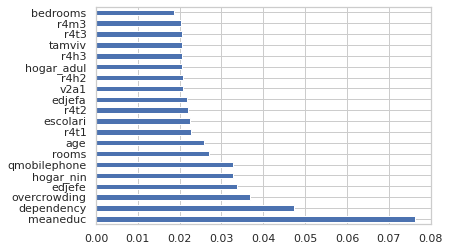

In [81]:
features = pd.Series(RF_classifier.feature_importances_, index=X_train.columns)
features.nlargest(20).plot(kind='barh')
plt.show()

**meanedu, dependency & overcrowding seem to be important predictors for the model along with other.**

In [82]:
print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred_rf, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           1       0.97      0.89      0.93       169
           2       0.96      0.88      0.92       302
           3       1.00      0.82      0.90       257
           4       0.93      0.99      0.96      1184

    accuracy                           0.94      1912
   macro avg       0.96      0.90      0.93      1912
weighted avg       0.95      0.94      0.94      1912

[[ 151    1    1   16]
 [   3  267    0   32]
 [   1    5  210   41]
 [   0    6    0 1178]]
Accuracy of the model on Testing Sample Data: 0.94


### Q10. Check the accuracy using a random forest with cross-validation?

In [83]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
RF_classifier_kfold = RandomForestClassifier(n_estimators=100,
                                            n_jobs = -1, random_state=10
                                            )
RF_classifier_kfold.fit(X_train,y_train)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X , y, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.94246862 0.94299163 0.93877551 0.94819466 0.95395081]

Final Average Accuracy of the model: 94.53


In [84]:
# # K Fold model prediction
test_prediction_kfold = RF_classifier_kfold.predict(test)
test_prediction_kfold

array([4, 4, 4, ..., 4, 4, 4])

In [85]:
Actual_vs_Pred = pd.DataFrame({"Actual class" : y_test, "Predicted class": y_pred_rf})
Actual_vs_Pred.head(10)

,Actual class,Predicted class
8503,2,2
7752,1,1
9350,1,1
8414,3,3
7671,2,2
4738,4,4
8677,4,4
965,4,4
3208,3,4
5285,4,4


<AxesSubplot:xlabel='Target', ylabel='count'>

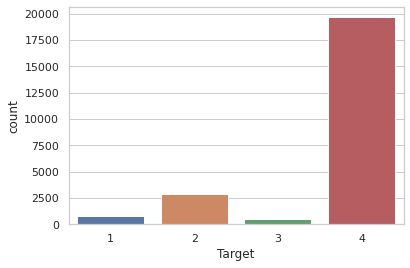

In [86]:
import warnings
warnings.filterwarnings("ignore")
sub = pd.read_csv('../input/costa-rican-household-poverty-prediction/sample_submission.csv')
sub['Target'] = np.array(test_prediction_kfold).astype(int)
sub.to_csv('submission.csv', index = False)
sns.countplot(sub['Target'])